In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample
from scipy.cluster.hierarchy import linkage, dendrogram

Importing the required libraries 

In [2]:
data = pd.read_csv("mcdonalds.csv")

In [3]:
 print(data.head())

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Yes   +4   69         Once a week  Female  
4         No   +2   49        Once a month    Male  


### The data is imported using pandas and then we check the data by printing the head of the data 

In [4]:
data.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [5]:
data.shape

(1453, 15)

In [6]:
data.info

<bound method DataFrame.info of      yummy convenient spicy fattening greasy fast cheap tasty expensive  \
0       No        Yes    No       Yes     No  Yes   Yes    No       Yes   
1      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes   
2       No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes   
3      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No   
4       No        Yes    No       Yes    Yes  Yes   Yes    No        No   
...    ...        ...   ...       ...    ...  ...   ...   ...       ...   
1448    No        Yes    No       Yes    Yes   No    No    No       Yes   
1449   Yes        Yes    No       Yes     No   No   Yes   Yes        No   
1450   Yes        Yes    No       Yes     No  Yes    No   Yes       Yes   
1451   Yes        Yes    No        No     No  Yes   Yes   Yes        No   
1452    No        Yes    No       Yes    Yes   No    No    No       Yes   

     healthy disgusting          Like  Age      VisitFrequency  Gen

### there are 15 columns in the data and we have 1453 number of observations in the data 

In [7]:
print(pd.isnull(data).sum())

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


In [8]:
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [9]:
data.info

<bound method DataFrame.info of      yummy convenient spicy fattening greasy fast cheap tasty expensive  \
0       No        Yes    No       Yes     No  Yes   Yes    No       Yes   
1      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes   
2       No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes   
3      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No   
4       No        Yes    No       Yes    Yes  Yes   Yes    No        No   
...    ...        ...   ...       ...    ...  ...   ...   ...       ...   
1448    No        Yes    No       Yes    Yes   No    No    No       Yes   
1449   Yes        Yes    No       Yes     No   No   Yes   Yes        No   
1450   Yes        Yes    No       Yes     No  Yes    No   Yes       Yes   
1451   Yes        Yes    No        No     No  Yes   Yes   Yes        No   
1452    No        Yes    No       Yes    Yes   No    No    No       Yes   

     healthy disgusting          Like  Age      VisitFrequency  Gen

In [10]:
print(data.dtypes)


yummy             object
convenient        object
spicy             object
fattening         object
greasy            object
fast              object
cheap             object
tasty             object
expensive         object
healthy           object
disgusting        object
Like              object
Age                int64
VisitFrequency    object
Gender            object
dtype: object


In [11]:
columns = data.columns[:11]
MD_x = data[columns].copy()

In [12]:
# Convert "Yes" and "No" to binary values
MD_x = (MD_x == "Yes").astype(int)

In [13]:
col_means = np.round(MD_x.mean(), 2)

In [14]:
MD_x

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [15]:
scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x)

In [39]:
MD_x_scaled

array([[-1.11147857,  0.31873518, -0.32134871, ...,  1.339489  ,
        -0.49827882, -0.56648839],
       [ 0.89970246,  0.31873518, -0.32134871, ...,  1.339489  ,
        -0.49827882, -0.56648839],
       [-1.11147857,  0.31873518,  3.11188424, ...,  1.339489  ,
         2.00690848, -0.56648839],
       ...,
       [ 0.89970246,  0.31873518, -0.32134871, ...,  1.339489  ,
        -0.49827882, -0.56648839],
       [ 0.89970246,  0.31873518, -0.32134871, ..., -0.74655335,
         2.00690848, -0.56648839],
       [-1.11147857,  0.31873518, -0.32134871, ...,  1.339489  ,
        -0.49827882,  1.76526126]])

Scaling the data using standardscaler

# PCA

In [21]:
from sklearn.decomposition import PCA
# Initialize PCA with the number of components you want (let's say 2 for example)
n_components = 11
pca = PCA(n_components=n_components)

In [22]:
MD_pca = pca.fit_transform(MD_x_scaled)

In [23]:
# Print the resulting PCA components and their explained variance ratio
print("PCA Components:")
print(pd.DataFrame(MD_pca, columns=[f"PC{i+1}" for i in range(n_components)]))

print("\nExplained Variance Ratio:")
print(pca.explained_variance_ratio_)

PCA Components:
           PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     0.704334 -0.437016  0.268698 -0.872074 -1.521184  0.470160 -0.030969   
1    -0.467820  0.364277 -1.596835 -0.004835  0.462385 -0.449321  0.087351   
2     0.191986  1.712949 -0.339413  3.368168 -1.266802  0.148058 -0.606634   
3    -0.116991 -1.155122 -1.003913  0.469589  1.141750 -0.857182  0.015843   
4    -0.034724 -1.390267  0.792275  0.473031 -0.270488 -0.847963 -1.804085   
...        ...       ...       ...       ...       ...       ...       ...   
1448  3.499105  1.069999  0.148971 -0.195977  0.787923  1.016536 -1.977414   
1449 -1.568786  0.899328  1.192503 -0.286497  2.234500  1.258306 -1.764159   
1450 -0.414275  1.810438 -1.071948 -0.901031 -0.750299  0.065975  0.720962   
1451 -2.803630  0.562759  2.278887  0.083924  0.080147 -0.969368 -0.384558   
1452  3.499105  1.069999  0.148971 -0.195977  0.787923  1.016536 -1.977414   

           PC8       PC9      PC10      PC11  


In [24]:
MD_pca_summary = pd.DataFrame({'Standard deviation': np.round(np.sqrt(pca.explained_variance_), 1),
                               'Proportion of Variance': np.round(pca.explained_variance_ratio_, 2),
                               'Cumulative Proportion': np.round(np.cumsum(pca.explained_variance_ratio_), 2)},
                              index=np.arange(1, len(pca.explained_variance_) + 1))

# Print PCA results
print(MD_pca_summary)

    Standard deviation  Proportion of Variance  Cumulative Proportion
1                  1.7                    0.26                   0.26
2                  1.3                    0.15                   0.40
3                  1.2                    0.13                   0.53
4                  1.0                    0.10                   0.63
5                  1.0                    0.08                   0.71
6                  0.9                    0.07                   0.78
7                  0.8                    0.06                   0.85
8                  0.8                    0.05                   0.90
9                  0.7                    0.05                   0.95
10                 0.6                    0.03                   0.98
11                 0.5                    0.02                   1.00


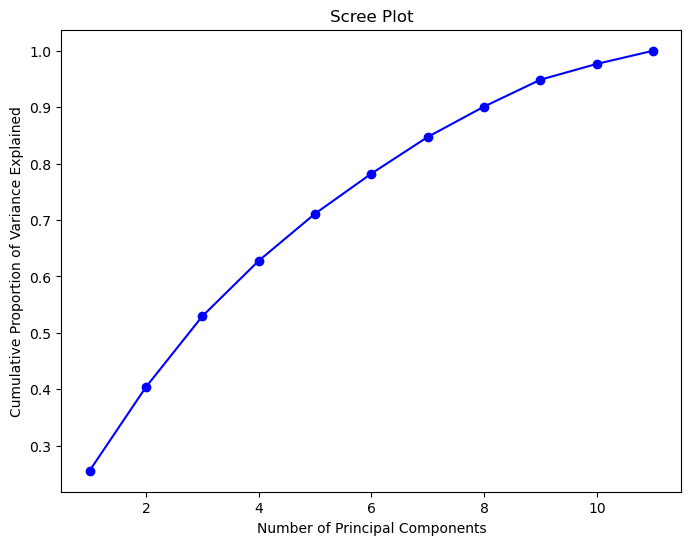

In [25]:
# Plot PCA
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(pca.explained_variance_) + 1), np.cumsum(pca.explained_variance_ratio_), 'bo-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.title('Scree Plot')
plt.show()

# K - means Clustering 

In [40]:
MD_x_scaled_df = pd.DataFrame(MD_x_scaled, columns=data.columns[:11])
non_numeric_cols = ['VisitFrequency', 'Gender']  # Add any other non-numeric columns here
numeric_cols = [col for col in MD_x_scaled_df.columns if col not in non_numeric_cols]
np.random.seed(1234)
n_clusters_range = range(2, 9)
inertia_scores = []
silhouette_scores = []

Converting NumPy array back to a DataFrame
Separating the non-numeric columns
Setting up the random seed for reproducibility
defining the range of clusters 
initializing  inertia and silhouette scores for each number of clusters

In [41]:
for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=1234)
    kmeans.fit(MD_x_scaled_df[numeric_cols])
    inertia_scores.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(MD_x_scaled_df[numeric_cols], kmeans.labels_))

best_num_clusters = np.argmax(silhouette_scores) + 2


best_kmeans = KMeans(n_clusters=best_num_clusters, random_state=1234)
best_kmeans.fit(MD_x_scaled_df[numeric_cols])

MD_x_scaled_df['Cluster'] = best_kmeans.labels_

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

Perform k-means clustering for different numbers of clusters
Inertia is the sum of squared distances of samples to their closest cluster center
Silhouette score measures the average distance between each sample and the neighboring clusters

In [42]:
print("Cluster Centers:")
print(best_kmeans.cluster_centers_)

cluster_sizes = MD_x_scaled_df['Cluster'].value_counts().sort_index()
print("\nCluster Sizes:")
print(cluster_sizes)

Cluster Centers:
[[-0.99176542  0.31873518 -0.32134871  0.32122128  0.5430073   0.33295085
  -0.05576386 -0.94767429  0.11021404 -0.46845517  1.76526126]
 [ 0.37956943  0.25914663 -0.32134871  0.30247323  0.01599419  0.33295085
  -1.13365022  0.29304537  1.339489   -0.17433219 -0.45593129]
 [-1.1014727   0.31873518 -0.32134871  0.11285345 -0.14772875  0.33295085
   0.51409875 -0.59732574 -0.71541839 -0.36117902 -0.56648839]
 [ 0.07252316  0.26299105  3.11188424 -0.13138513  0.12460063  0.27913799
   0.12757165  0.30524319  0.11141568  0.35025236  0.01644903]
 [-1.00921513 -3.13740077 -0.11768235 -0.08305597  0.40520269 -0.88285489
  -0.52999809 -1.13311445  0.57932102 -0.34966602  1.2712465 ]
 [ 0.89970246  0.25570535 -0.32134871  0.19434704 -0.08655007  0.33295085
   0.57055744  0.63527449 -0.72753169 -0.49827882 -0.43891546]
 [ 0.66182083  0.26299105 -0.32134871 -1.03433491 -0.63453058  0.24326276
   0.53341692  0.63090548 -0.4773866   1.99343973 -0.47873437]
 [-0.09530289  0.2823548

Cluster centers and sizes 

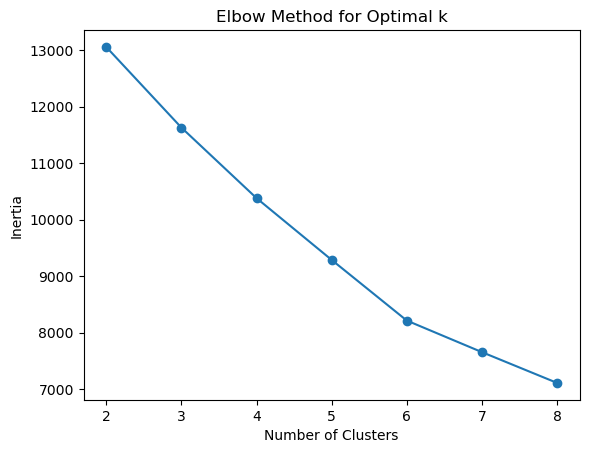

In [43]:
plt.plot(n_clusters_range, inertia_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

From ELbow method we will take k as 6

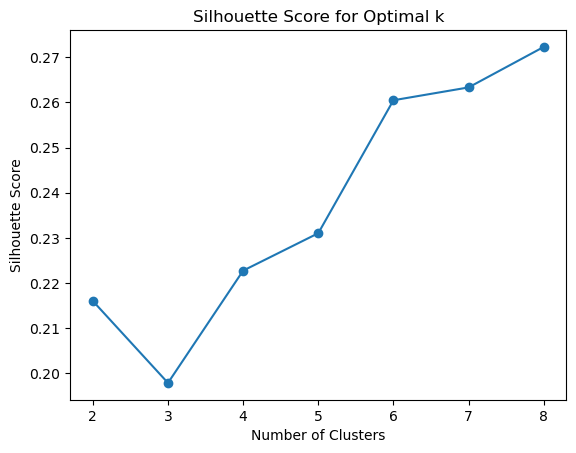

In [44]:
plt.plot(n_clusters_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()

In [45]:
for cluster_num in range(best_num_clusters):
    cluster_samples = MD_x_scaled_df[MD_x_scaled_df['Cluster'] == cluster_num]
    print(f"\nCluster {cluster_num} - Number of samples: {len(cluster_samples)}")
    print(cluster_samples)



Cluster 0 - Number of samples: 168
         yummy  convenient     spicy  fattening    greasy      fast     cheap  \
10   -1.111479    0.318735 -0.321349   0.391375 -1.054476  0.332951  0.818605   
33   -1.111479    0.318735 -0.321349   0.391375  0.948339  0.332951  0.818605   
35   -1.111479    0.318735 -0.321349   0.391375  0.948339  0.332951  0.818605   
37   -1.111479    0.318735 -0.321349   0.391375  0.948339  0.332951  0.818605   
44   -1.111479    0.318735 -0.321349   0.391375  0.948339  0.332951  0.818605   
...        ...         ...       ...        ...       ...       ...       ...   
1415 -1.111479    0.318735 -0.321349   0.391375  0.948339  0.332951 -1.221590   
1419 -1.111479    0.318735 -0.321349   0.391375  0.948339  0.332951  0.818605   
1430 -1.111479    0.318735 -0.321349   0.391375  0.948339  0.332951  0.818605   
1435 -1.111479    0.318735 -0.321349   0.391375  0.948339  0.332951  0.818605   
1445 -1.111479    0.318735 -0.321349   0.391375  0.948339  0.332951  0.81

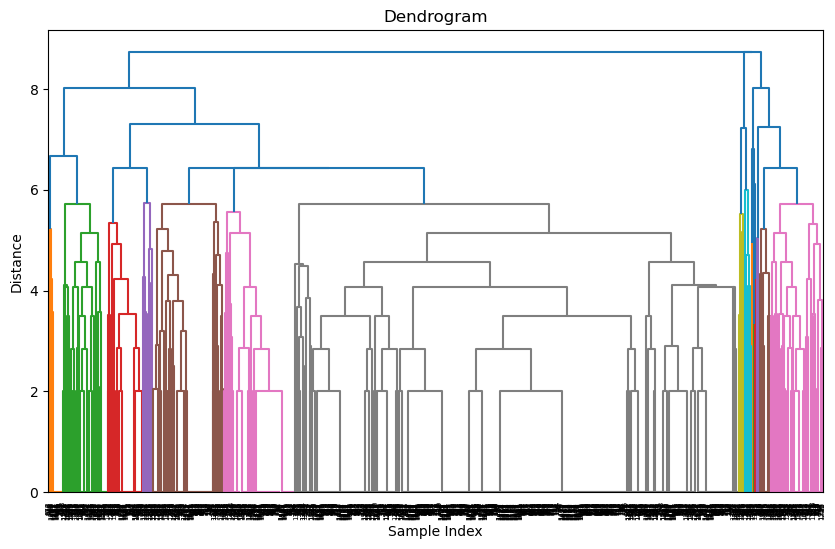

In [49]:
# Compute the linkage matrix using complete linkage method
linkage_matrix = linkage(MD_x_scaled_df[numeric_cols], method='complete')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=MD_x_scaled_df.index, orientation='top')
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.xticks(rotation=90)
plt.show()